<h2> import packages and the cnn </h2>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
x = np.load('C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/fruit_vegetable/image_pixel_200.npy') # loading it

In [25]:
labels = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/fruit_vegetable/labels.csv",delimiter=',')

In [26]:
from keras.models import model_from_json
# load json and create model
json_file = open('model_simple.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_simple.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
def interpretation(picture_1):
    true_labels = []
    subset = (labels.iloc[picture_1] == 1)
    true_labels = labels.iloc[picture_1][subset]
    return true_labels

In [28]:
def prob_real(picture_x):
    data_frame = []
    probabilities = loaded_model.predict(x[picture_x:picture_x+1,:,:,:])
    my_labels = labels.iloc[picture_x].tolist()
    list_tuples = list(zip(probabilities[0],my_labels))
    dframe = pd.DataFrame(list_tuples,columns = ['probabilities','true_label'], index = labels.columns)
    sorted_dataframe = dframe.sort_values(by='probabilities',ascending=False)
    return sorted_dataframe

<h2> Make predictions </h2>

In [29]:
columns = labels.columns[:7]
labels.drop(columns,inplace=True,axis=1)

<h2> Picture of desired array </h2>

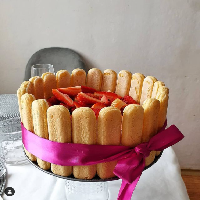

In [37]:
img_35 = image.array_to_img(x[300,:,:])
img_35

<h2> True label discoverer </h2>

In [38]:
interpretation(300)

tag_fruit    1
Name: 300, dtype: int64

<h2> Dataframe of probabilities and true labels </h2>

In [39]:
prob_real(300)

,probabilities,true_label
tag_fruit,0.866721,1
tag_vegetables,0.122140,0


In [33]:
result = loaded_model.predict(x[0:1])

In [11]:
result.round()

array([[1., 0.]], dtype=float32)